In [1]:
import baseline_grid_cv

%run baseline_grid_cv.py

## 1. **ABIDEI**: ASD classification with `fmriprep (AROMA)` preprocessing

Functional connectivity features (ROI correlations) for AAL atlas (116 regions).
1088 subjects, in-house preprocessing.

In [2]:
data = pd.read_csv('/home/kondrateva/abide/abide_preproc/ABIDEI_AAL_0.08_0.009_29.11.2020.csv', low_memory=False)
data  = data[data.columns[1:]]

In [3]:
X = data[data.columns[:6670]]
y = data["DX_GROUP"]
X.shape, y.shape

len(data['SUB_ID'].drop_duplicates())

1088

In [5]:
X = data[data.columns[:6670]]
le = LabelEncoder()
z = pd.DataFrame(le.fit_transform(data['SITE_ID']))[0]
y = pd.DataFrame(le.fit_transform(data['DX_GROUP']))[0]

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [6]:
X.shape, y.shape

((1088, 6670), (1088,))

In [7]:
y.value_counts()

1    562
0    526
Name: 0, dtype: int64

In [8]:
temp_grid = GridCV(X, y)

grid_schz_vs_c = temp_grid.train()

Number of samples  1088 

Number of features  6670 

Target distribution: 
1    562
0    526
Name: 0, dtype: int64 

Training SVC...
(training took 81.04480051994324s)

Training LR...
(training took 176.5229790210724s)

Training RFC...
(training took 144.2902102470398s)

Training KNN...
(training took 37.943190574645996s)
Scoring: roc_auc


,best parameters,best dim. reduction method,mean,std
classifier,,,,
SVC,classifier__kernel = rbf,SelectNFeaturesFromModel(estimator=LogisticReg...,0.619019,0.032301
LR,"classifier__C = 0.01, classifier__penalty = l2",SelectNFeaturesFromModel(estimator=LogisticReg...,0.621505,0.036239
RFC,classifier__n_estimators = 190,SelectNFeaturesFromModel(estimator=RandomFores...,0.608753,0.036414
KNN,,SelectNFeaturesFromModel(estimator=RandomFores...,0.565163,0.028879


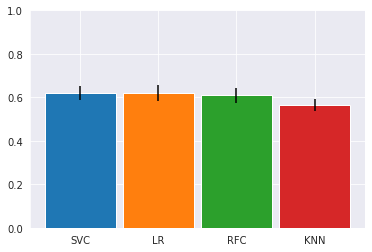

Best model: 
LR
classifier__C = 0.01
classifier__penalty = l2
dim_reduction = SelectNFeaturesFromModel(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=100,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=42,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                         n_selected=100, pre

In [9]:
temp_grid.print_results()

### 1.1. 10 fold cross-validation

In [17]:
lr_model = temp_grid.grid[0]

from sklearn.model_selection import cross_val_score
cv_result_lr = cross_val_score(lr_model, X, y, cv=10, scoring = 'roc_auc')

In [18]:
print(cv_result_lr)
print('ROC/AUC for LR model:', np.mean(cv_result_lr), np.std(cv_result_lr))

[0.58906883 0.57860999 0.64925876 0.64285714 0.66610512 0.59198113
 0.58456873 0.6324124  0.5364011  0.67616758]
ROC/AUC for LR model: 0.6147430782144039 0.04270339280421179


## 2. **ABIDEI**: ASD classification with `CPAC` preprocessing

Functional connectivity features (ROI correlations) for `CC200` atlas (200 regions).
1035 subjects with `CPAC` pipeline preprocessing, time series per ROI from `download_abide_preproc.py`, correlation matrices calculated in `nilearn` manually.

In [33]:
data = pd.read_csv('/home/kondrateva/abide/abide_preproc/ABIDEI_CC200_29.11.2020.csv', low_memory=False)
data  = data[data.columns[1:]]

In [34]:
X = data[data.columns[:19900]]
y = data["DX_GROUP"]
X.shape, y.shape

len(data['SUB_ID'].drop_duplicates())

1035

In [35]:
le = LabelEncoder()
z = pd.DataFrame(le.fit_transform(data['SITE_ID']))[0]
y = pd.DataFrame(le.fit_transform(data['DX_GROUP']))[0]

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [36]:
X.shape, y.shape

((1035, 19900), (1035,))

In [37]:
temp_grid = GridCV(X, y)

grid_schz_vs_c = temp_grid.train()

Number of samples  1035 

Number of features  19900 

Target distribution: 
1    530
0    505
Name: 0, dtype: int64 

Training SVC...
(training took 156.99422979354858s)

Training LR...
(training took 292.7881529331207s)

Training RFC...
(training took 159.0678195953369s)

Training KNN...
(training took 44.50959634780884s)
Scoring: roc_auc


,best parameters,best dim. reduction method,mean,std
classifier,,,,
SVC,classifier__kernel = rbf,"SelectKBest(k=100, score_func=<function f_clas...",0.721255,0.034990
LR,"classifier__C = 0.01, classifier__penalty = l2","SelectKBest(k=100, score_func=<function f_clas...",0.724383,0.032161
RFC,classifier__n_estimators = 190,"SelectKBest(k=100, score_func=<function f_clas...",0.717519,0.031892
KNN,,"SelectKBest(k=100, score_func=<function f_clas...",0.675367,0.043038


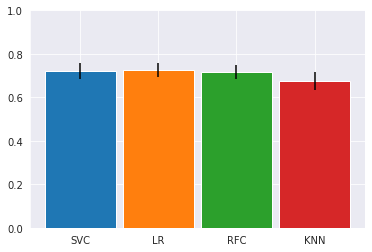

Best model: 
LR
classifier__C = 0.01
classifier__penalty = l2
dim_reduction = SelectKBest(k=100, score_func=<function f_classif at 0x7fcc74878598>)


In [39]:
temp_grid.print_results()

### 2.1. 10 fold cross-validation

In [40]:
lr_model = temp_grid.grid[0]

from sklearn.model_selection import cross_val_score
cv_result_lr = cross_val_score(lr_model, X, y, cv=10, scoring = 'roc_auc')

In [41]:
print(cv_result_lr)
print('ROC/AUC for LR model:', np.mean(cv_result_lr), np.std(cv_result_lr))

[0.73436922 0.7254902  0.74953755 0.74879763 0.66888642 0.69849057
 0.7890566  0.64226415 0.72188679 0.66528302]
ROC/AUC for LR model: 0.7144062153163151 0.04302315806770082


## 3.1. Data visualisation `fmriprep(AROMA)`

In [45]:
from sklearn import manifold
from time import time
from matplotlib import cm
def tsne_plot (X = X, z = z, le = le):
    
    """
    X - training data, to be scales and Imputed,
    z - hue for targets 
    
    """
    t0 = time()
    tsne = manifold.TSNE(n_components=2, n_iter = 2000, 
                         learning_rate= 50, verbose=0, random_state = 42)
    T = tsne.fit_transform(X)
    t1 = time()
    print ("T-distributed stochastic neighbor embedding. (time %.2fs)" %
                   (time() - t0))
    
    plt.figure(figsize = (8, 8))
    for c_i, c in enumerate(set(z)):
        sub_sub_inds = np.where(z == c)[0]
        plt.scatter(T[sub_sub_inds, 0], 
                    T[sub_sub_inds, 1], 
                    s = 5, 
                    edgecolor = 'none', 
                    label = str(le.inverse_transform([c])[0]), 
                    color = cm.tab20(int(c_i)))

    lgd = plt.legend(loc = 2, bbox_to_anchor = (1, 1), markerscale = 5, fontsize = 14)
    plt.xlabel('Embedding axis 1', fontsize = 14)
    plt.ylabel('Embedding axis 2', fontsize = 14)
    
    return (T)

In [50]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X = data[data.columns[:6670]]
y = data["DX_GROUP"]

z = le.fit_transform(data["SITE_ID"])

T-distributed stochastic neighbor embedding. (time 6.62s)


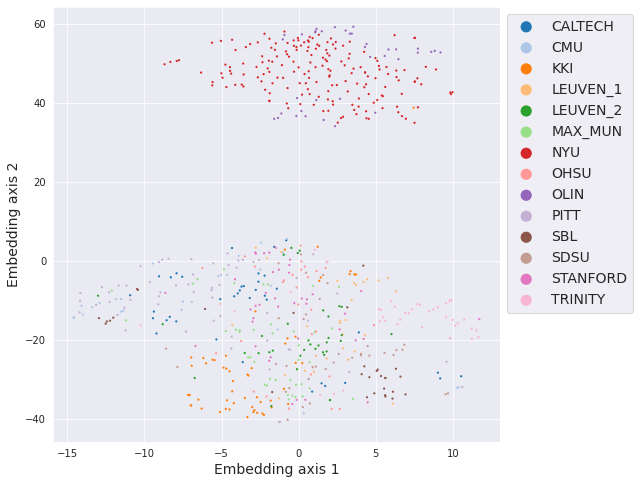

In [52]:
tsne_plot (X = X, z = z, le = le);

## 3.2. Data visualisation `CPAC`

In [43]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X = data[data.columns[:19900]]
y = data["DX_GROUP"]

z = le.fit_transform(data["SITE_ID"])

T-distributed stochastic neighbor embedding. (time 45.99s)


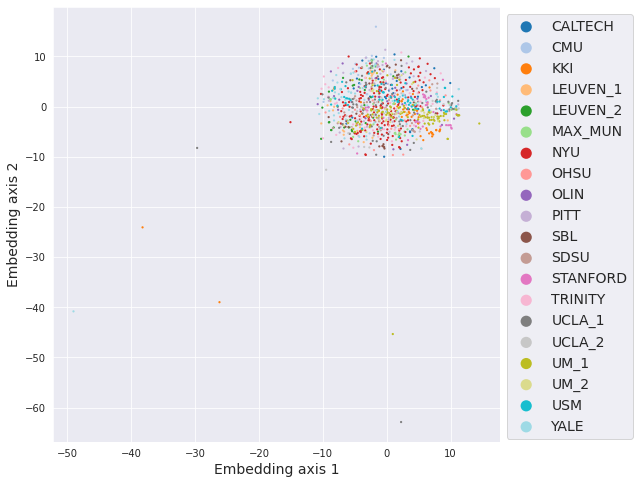

In [46]:
tsne_plot (X = X, z = z, le = le);

## 3.3. Plotting the sample demographics

6.47 64.0


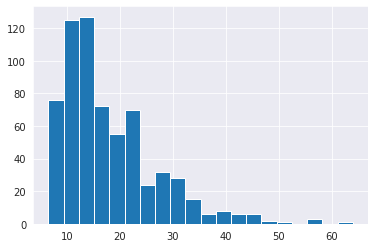

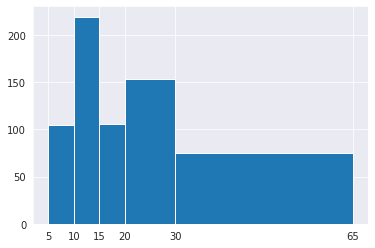

In [15]:
targets = data

print(targets["AGE_AT_SCAN"].min(), targets["AGE_AT_SCAN"].max())
plt.hist(targets["AGE_AT_SCAN"].values, bins=20)
plt.show()
groups_boundaries = [5., 10., 15., 20., 30., 65.]
plt.hist(targets["AGE_AT_SCAN"].values, bins=groups_boundaries)
plt.xticks(ticks=groups_boundaries)
plt.show()